## Background Removal using Singular Value Decomposition (SVD)

In [5]:
import imageio
import numpy as np
import moviepy.editor as mpe
import numpy as np
import scipy
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [6]:
s=289963
np.random.seed(s)

print('Starting to extract the background...')
for j in range(3):
    vidcap = cv2.VideoCapture('test_vid.mp4')
    count = 0
    success,image = vidcap.read()
    orig_shape = image.shape
    if j == 0:
        print("Video resolution: ",orig_shape[0:2])
        first_img = image
    arr = image[:,:,j]
    flat_arr = arr.ravel()
    flat_vector = flat_arr
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*500))
        success,image = vidcap.read()
        if not success:
            break
        arr = image[:,:,j]
        flat = arr.ravel()
        flat_vector = np.vstack([flat_vector, flat])
        count += 1
    SVD = np.linalg.svd(flat_vector.T, full_matrices=False)
    u, s, v = SVD
    Ar = np.zeros((len(u), len(v)))
    for i in range(1):
        Ar += s[i] * np.outer(u.T[i], v[i])    
    if (j==0):
        new_flat_vector_0=(Ar.T)
    elif j==1:
        new_flat_vector_1=(Ar.T)
    elif j==2:
        new_flat_vector_2=(Ar.T)
new_flat_vector = np.zeros((len(flat_vector), len(flat_vector.T)*3))
for i in range(len(new_flat_vector_0.T)):
    new_flat_vector[:,i+i*2]   = new_flat_vector_0[:,i]
    new_flat_vector[:,i+1+i*2] = new_flat_vector_1[:,i]
    new_flat_vector[:,i+2+i*2] = new_flat_vector_2[:,i]
    

Starting to extract the background...
Video resolution:  (1080, 1920)


Final image size:  (1080, 1920, 3)
The static background extracted:


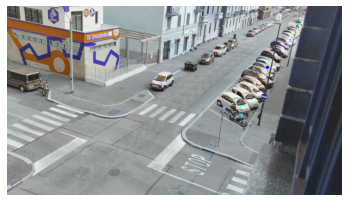

In [11]:
vector12 = np.matrix(new_flat_vector[12])
arr2 = np.asarray(vector12).reshape(orig_shape)
print("Final image size: ",arr2.shape)
cv2.imwrite('savedImage.jpg', arr2)
# arr2 = cv2.cvtColor(arr2, cv2.COLOR_BGR2RGB) 
print('The static background extracted:')
plt.axis('off')
plt.imshow((arr2).astype(np.uint8))
plt.savefig('back.eps', format='eps')
plt.show()